<a href="https://colab.research.google.com/github/Pauw1/Challenge_Telecom_X_Analisis_Evasion_Clientes/blob/main/PR_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**
*Challenge N°2 de Especialización en Data Sience 2025*

*Grupo 8 del Programa ONE con Alura Latam*

**Empresa:** Telecom X
Proyecto: "Churn de Clientes"

**Problema:**  La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

**Desafío:** Recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa.

Con este análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

**Práctica de:**
* ✅ **Importar y manipular datos** desde una API
de manera eficiente.
* ✅ **Aplicar los conceptos de ETL** (Extracción, Transformación y Carga) en la preparación de los datos.
* ✅ **Crear visualizaciones estratégicas** para identificar patrones y tendencias.
* ✅ **Realizar un Análisis Exploratorio de Datos (EDA)** y generar un informe con insights relevantes.


#📌 Extracción

In [31]:
import pandas as pd
import requests
import json
import numpy as np

In [32]:
df = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

resultado = json.loads(df.text)

df = pd.DataFrame(resultado)
df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [33]:
id_churn = df[['customerID', 'Churn']]
id_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [34]:
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

#concatenando para crear el df base

telecom_df = pd.concat([id_churn, customer, phone, internet, account], axis=1)
telecom_df.sample(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3980,5443-SCMKX,No,Female,0,Yes,No,58,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,94.30,5610.15
5940,8108-UXRQN,No,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,50.55,565.35
6579,9052-VKDUW,No,Female,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),109.40,7227.45
3826,5233-GEEAX,Yes,Male,1,No,No,8,No,No phone service,DSL,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.40,221.9


In [35]:
telecom_df.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'es_ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
    'Churn': 'abandono'
}, inplace=True)

telecom_df.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [36]:
telecom_df.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales'],
      dtype='object')

In [37]:
telecom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [38]:
telecom_df.isnull().sum()

,0
id_cliente,0
abandono,0
genero,0
es_ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
tipo_internet,0


In [39]:
print(telecom_df.duplicated().sum())

0


In [40]:
for col in ['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales']:
    print(f"Valores únicos para la columna '{col}':")
    print(telecom_df[col].unique())
    print("-" * 20)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'abandono':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
--------------------
Valores únicos para la columna 'es_ciudadano_senior':
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_en_empresa':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico':
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiples':
['No'

In [41]:
telecom_df['id_cliente'] = telecom_df['id_cliente'].str.strip()
telecom_df['id_cliente'].sample(4)

,id_cliente
228,0343-QLUZP
1808,2577-GVSIL
5079,6941-KXRRV
3172,4430-UZIPO


In [42]:
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.lower()
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()

In [43]:
telecom_df['tipo_contrato'].sample(4)

,tipo_contrato
518,two year
4646,month to month
5464,one year
605,one year


In [44]:
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.lower()
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.replace(r'\(|\)', '', regex=True).str.strip()

In [45]:
telecom_df['metodo_pago'].sample(4)

,metodo_pago
5957,electronic check
5455,bank transfer automatic
5937,bank transfer automatic
5099,mailed check


In [46]:
telecom_df['cargos_totales'] = telecom_df['cargos_totales'].replace(' ', np.nan)

telecom_df['cargos_totales'] = pd.to_numeric(telecom_df['cargos_totales'], errors='coerce')
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [47]:
telecom_df['cargos_totales'].isna().sum()

np.int64(11)

In [48]:
telecom_df = telecom_df.dropna(subset=['cargos_totales'])

print(f"Número de registros después de limpieza: {len(telecom_df)}")

Número de registros después de limpieza: 7256


In [49]:
col_binario = ['abandono','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
telecom_df[col_binario].sample(4)

,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
5139,No,Yes,No,Yes,No
1965,No,No,No,Yes,No
7059,No,Yes,Yes,Yes,Yes
1689,Yes,No,Yes,Yes,No


In [50]:
telecom_df.loc[:, col_binario] = telecom_df[col_binario].astype(str)
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)
telecom_df[col_binario].sample(4)

/tmp/ipython-input-1931191445.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
/tmp/ipython-input-1931191445.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)


,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
640,0.0,0,0,1,1
4027,0.0,1,1,1,0
3910,0.0,1,1,1,0
4360,0.0,1,1,1,1


In [51]:
telecom_df[col_binario] = telecom_df[col_binario].astype(np.int64)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_streaming            7256 non-null   objec

#📊 Carga y análisis

In [52]:
telecom_df['cuentas_diarias'] = telecom_df['cargos_mensuales']/30
telecom_df[['cargos_mensuales', 'cuentas_diarias']].sample(4)

,cargos_mensuales,cuentas_diarias
6982,20.45,0.681667
4334,83.55,2.785000
5951,79.65,2.655000
5650,20.55,0.685000


In [53]:
telecom_df.describe()

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


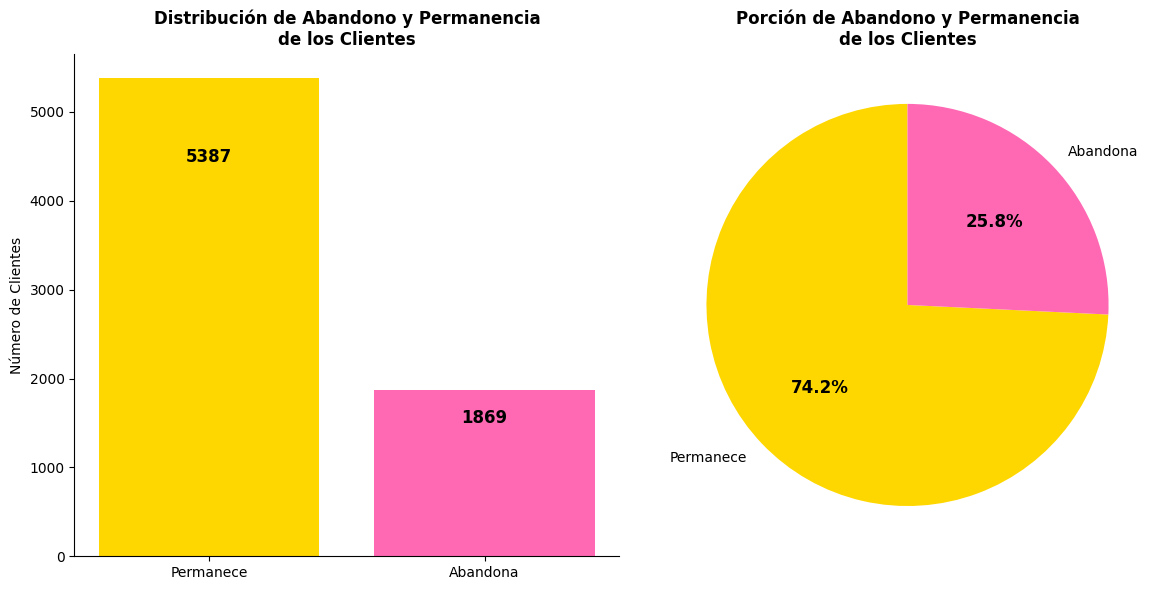

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Import numpy for potential future use or if your original telecom_df uses it

# Assuming 'telecom_df' is already loaded. If not, you'll need to load it first.
# For demonstration purposes, let's create a dummy DataFrame if telecom_df is not defined.
try:
    telecom_df["abandono"].value_counts()
except NameError:
    print("telecom_df not found, creating a dummy DataFrame for demonstration.")
    data = {'abandono': np.random.choice([0, 1], size=1000, p=[0.7, 0.3])}
    telecom_df = pd.DataFrame(data)


abandono_counts = telecom_df["abandono"].value_counts().sort_index()
abandono_props = telecom_df["abandono"].value_counts(normalize=True).sort_index()
labels = ["Permanecen", "Abandonan"]
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # Increased figure size slightly for better visibility

# Define a custom color palette with pink and yellow tones
# You can adjust these hex codes to get your desired shades
custom_colors = ['#FFD700', '#FF69B4'] # Gold (yellowish) and Hot Pink

# Gráfico de barras
bars = axs[0].bar(
    abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    abandono_counts.values,
    color=custom_colors # Use the custom colors here
)

for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Abandono y Permanencia\nde los Clientes', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height / 1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

axs[0].grid(False)

# Gráfico de pastel
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    autopct=custom_autopct,
    startangle=90,
    colors=custom_colors,
    textprops={'fontsize': 10}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porción de Abandono y Permanencia\nde los Clientes', fontsize=12, weight='bold', loc='center')

plt.tight_layout()
plt.show()

In [56]:

def analizar_evasion_por_categoria(df, columna):
    cruzado = pd.crosstab(df[columna], df['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'tipo_internet']

resultados = {}
for cat in categoricas:
    resultados[cat] = analizar_evasion_por_categoria(telecom_df, cat)


Análisis para: genero
        % No Abandono  % Abandono
genero                           
Female      73.822135   26.177865
Male        74.652494   25.347506

Análisis para: tipo_contrato
                % No Abandono  % Abandono
tipo_contrato                            
month to month      58.676654   41.323346
one year            89.064559   10.935441
two year            97.230237    2.769763

Análisis para: metodo_pago
                         % No Abandono  % Abandono
metodo_pago                                       
bank transfer automatic      83.742911   16.257089
credit card automatic        85.194639   14.805361
electronic check             56.196319   43.803681
mailed check                 81.412191   18.587809

Análisis para: tipo_internet
               % No Abandono  % Abandono
tipo_internet                           
DSL                81.514297   18.485703
Fiber optic        59.443402   40.556598
No                 92.825397    7.174603


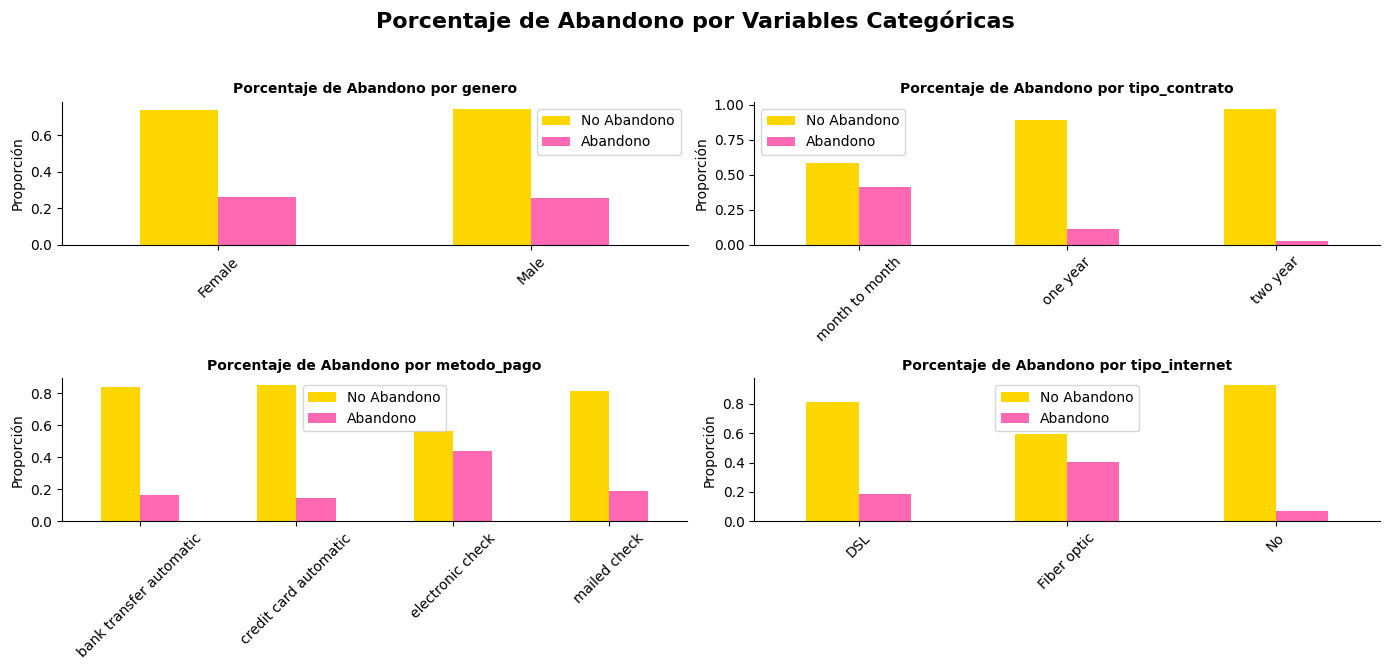

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'telecom_df' and 'categoricas' are already defined.
# For demonstration, let's create dummy data if they are not.
try:
    telecom_df["abandono"].value_counts()
except NameError:
    print("telecom_df not found, creating a dummy DataFrame for demonstration.")
    data = {
        'abandono': np.random.choice([0, 1], size=1000, p=[0.7, 0.3]),
        'genero': np.random.choice(['Masculino', 'Femenino'], size=1000),
        'casado': np.random.choice(['Si', 'No'], size=1000),
        'contrato': np.random.choice(['Mensual', 'Anual', 'Dos años'], size=1000)
    }
    telecom_df = pd.DataFrame(data)
    categoricas = ['genero', 'casado', 'contrato'] # Example categorical columns

# Define the custom color palette (same as before)
custom_colors = ['#FFD700', '#FF69B4'] # Gold (yellowish) and Hot Pink

# Configuración de subplots: 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 7))
axes = axes.flatten()

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(telecom_df[cat], telecom_df['abandono'], normalize='index')

    # Use the custom_colors here
    cruzado.plot(kind='bar', ax=axes[i], color=custom_colors)

    axes[i].set_title(f'Porcentaje de Abandono por {cat}', fontsize=10, weight='bold') # Smaller title for subplots
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(['No Abandono', 'Abandono'])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].spines['top'].set_visible(False) # Hide top spine
    axes[i].spines['right'].set_visible(False) # Hide right spine

# Hide any unused subplots if the number of categorical variables is odd
for j in range(len(categoricas), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Porcentaje de Abandono por Variables Categóricas', fontsize=16, weight='bold', ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

In [58]:
binarias = ['es_ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
def analizar_evasion_binarias(df, columna):
    # Mapeo opcional para mejor legibilidad (0 = No, 1 = Sí)
    df_temp = df.copy()
    df_temp[columna] = df_temp[columna].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[columna], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Resultados por columna binaria
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = analizar_evasion_binarias(telecom_df, col)


Análisis para: es_ciudadano_senior
                     % No Abandono  % Abandono
es_ciudadano_senior                           
No                       77.066184   22.933816
Sí                       59.729272   40.270728

Análisis para: tiene_pareja
              % No Abandono  % Abandono
tiene_pareja                           
No                67.974380   32.025620
Sí                80.934739   19.065261

Análisis para: tiene_dependientes
                    % No Abandono  % Abandono
tiene_dependientes                           
No                      69.661817   30.338183
Sí                      84.976959   15.023041

Análisis para: servicio_telefonico
                     % No Abandono  % Abandono
servicio_telefonico                           
No                       75.886525   24.113475
Sí                       74.065028   25.934972

Análisis para: factura_electronica
                     % No Abandono  % Abandono
factura_electronica                           
No            

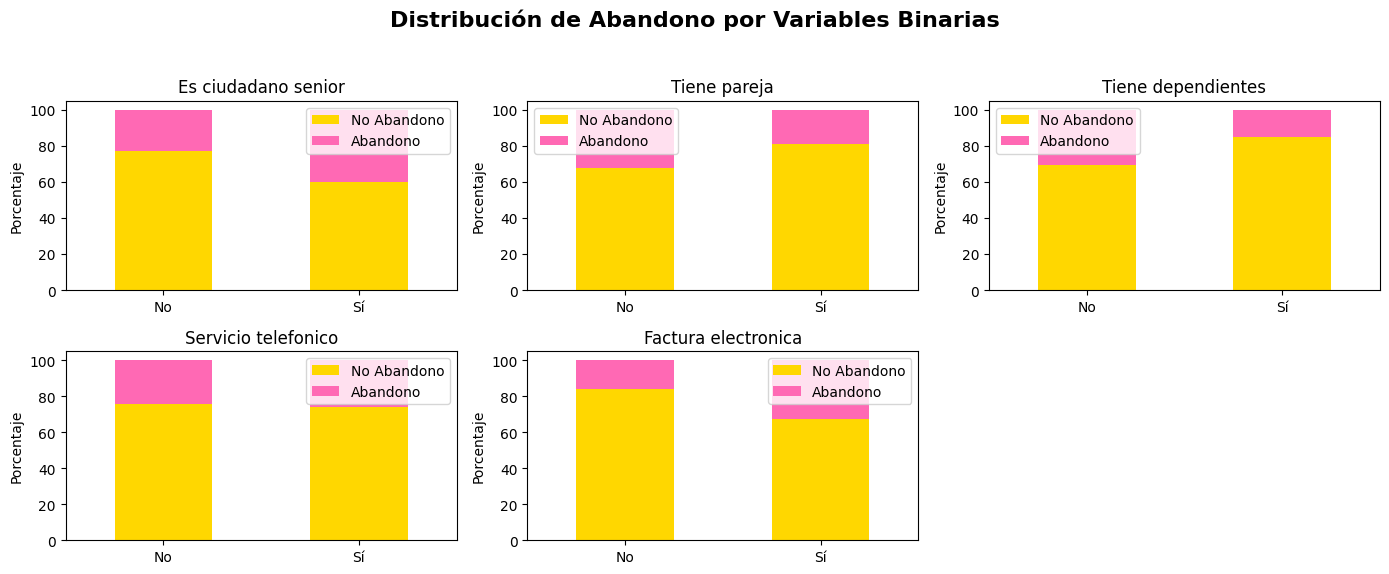

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'telecom_df' and 'binarias' are already defined.
# For demonstration purposes, let's create a dummy DataFrame if they are not.
try:
    telecom_df["abandono"].value_counts()
except NameError:
    print("telecom_df not found, creating a dummy DataFrame for demonstration.")
    data = {
        'abandono': np.random.choice([0, 1], size=1000, p=[0.7, 0.3]),
        'jubilado': np.random.choice([0, 1], size=1000),
        'dependientes': np.random.choice([0, 1], size=1000),
        'servicio_telefonico': np.random.choice([0, 1], size=1000),
        'varias_lineas': np.random.choice([0, 1], size=1000)
    }
    telecom_df = pd.DataFrame(data)
    binarias = ['jubilado', 'dependientes', 'servicio_telefonico', 'varias_lineas'] # Example binary columns

# Define the custom color palette
custom_colors = ['#FFD700', '#FF69B4'] # Gold (yellowish) and Hot Pink

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for idx, col in enumerate(binarias):
    df_temp = telecom_df.copy()
    df_temp[col] = df_temp[col].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[col], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['No Abandono', 'Abandono']

    # Use the custom_colors here
    cruzado.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[idx])
    axes[idx].set_title(f'{col.replace("_", " ").capitalize()}')
    axes[idx].set_ylabel('Porcentaje')
    axes[idx].set_xlabel('')
    axes[idx].legend(loc='best')
    axes[idx].tick_params(axis='x', rotation=0)

# Eliminar subplot vacío
if len(binarias) < len(axes):
    for j in range(len(binarias), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Distribución de Abandono por Variables Binarias', fontsize=16, weight='bold', ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [62]:
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
def analizar_evasion_numericas(df, columnas, bins=4):

    resultados = {}

    for col in columnas:
        # Crear intervalos (bins)
        df[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Tabla cruzada
        cruzado = pd.crosstab(df[f'{col}_bin'], df['abandono'], normalize='index') * 100
        cruzado.columns = ['% No Abandono', '% Abandono']

        print(f'\nAnálisis por rangos para: {col}')
        print(cruzado)

        resultados[col] = cruzado

    return resultados


resultados_numericas = analizar_evasion_numericas(telecom_df, numericas, bins=5)


Análisis por rangos para: meses_en_empresa
                      % No Abandono  % Abandono
meses_en_empresa_bin                           
(0.999, 6.0]              48.590164   51.409836
(6.0, 20.0]               67.456446   32.543554
(20.0, 40.0]              78.305785   21.694215
(40.0, 60.0]              84.924623   15.075377
(60.0, 72.0]              93.590627    6.409373

Análisis por rangos para: cargos_mensuales
                      % No Abandono  % Abandono
cargos_mensuales_bin                           
(18.249, 25.05]           91.114149    8.885851
(25.05, 58.7]             75.763889   24.236111
(58.7, 79.1]              71.114168   28.885832
(79.1, 94.3]              64.872326   35.127674
(94.3, 118.75]            68.206897   31.793103

Análisis por rangos para: cargos_totales
                    % No Abandono  % Abandono
cargos_totales_bin                           
(18.799, 266.6]         55.509642   44.490358
(266.6, 939.7]          72.019297   27.980703
(939.7, 2033.8

In [63]:
import plotly.express as px
import pandas as pd
import numpy as np

# Creamos un DataFrame de ejemplo si no existe 'telecom_df'
try:
    telecom_df["abandono"].value_counts()
except NameError:
    print("telecom_df no se encuentra, creando un DataFrame de ejemplo.")
    np.random.seed(42)
    data = {
        'meses_en_empresa': np.random.randint(1, 72, 1000),
        'cargos_mensuales': np.random.uniform(20, 150, 1000),
        'cargos_totales': np.random.uniform(500, 8000, 1000),
        'cuentas_diarias': np.random.uniform(5, 50, 1000),
        'abandono': np.random.choice([0, 1], size=1000, p=[0.7, 0.3])
    }
    telecom_df = pd.DataFrame(data)

def graficar_barras_abandono_interactivo(df, columnas, bins=10):
    datos_plot = []

    for col in columnas:
        df_temp = df.copy()
        df_temp[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')
        df_temp[f'{col}_bin'] = df_temp[f'{col}_bin'].astype(str)

        resumen = df_temp.groupby(f'{col}_bin', observed=True)['abandono'].mean().reset_index()
        resumen['abandono'] = resumen['abandono'] * 100
        resumen['variable'] = col
        resumen = resumen.rename(columns={f'{col}_bin': 'rango', 'abandono': 'porcentaje_abandono'})
        datos_plot.append(resumen)

    datos_todos = pd.concat(datos_plot)

    # Definir una secuencia de colores personalizada (naranja, morado, azul, verde)
    colores = ['#FF8C00', '#8A2BE2', '#1E90FF', '#32CD32']

    plotly_fig = px.bar(
        datos_todos,
        x='rango',
        y='porcentaje_abandono',
        color='variable',
        # Usar la secuencia de colores personalizada
        color_discrete_sequence=colores,
        barmode='group',
        # Ajustar el grosor de las barras con 'relative' y 'bargap'
        # bargap es el espacio entre barras del mismo grupo (0.2),
        # y bar_groupgap es el espacio entre grupos (0.1)
        # Esto hace las barras mas anchas
        title='Porcentaje de abandono según variables numéricas',
        labels={'rango': 'Rango de valor', 'porcentaje_abandono': '% de abandono', 'variable': 'Variable'}
    )

    plotly_fig.update_layout(
        width=900,
        height=500,
        xaxis_tickangle=-45,
        template='plotly_white',
        font=dict(family='Arial', size=14, color='black')
    )

    # Ajustar el grosor de las barras
    plotly_fig.update_traces(marker_line_width=0)
    plotly_fig.update_layout(bargap=0.2, bargroupgap=0.1)


    plotly_fig.show()
    return plotly_fig

# Llamar la función
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
plotly_figure_for_saving = graficar_barras_abandono_interactivo(telecom_df, numericas)

# Guardar como archivo
output_path = '/content/telecomx_evasion_clientes.html'
plotly_figure_for_saving.write_html(output_path)

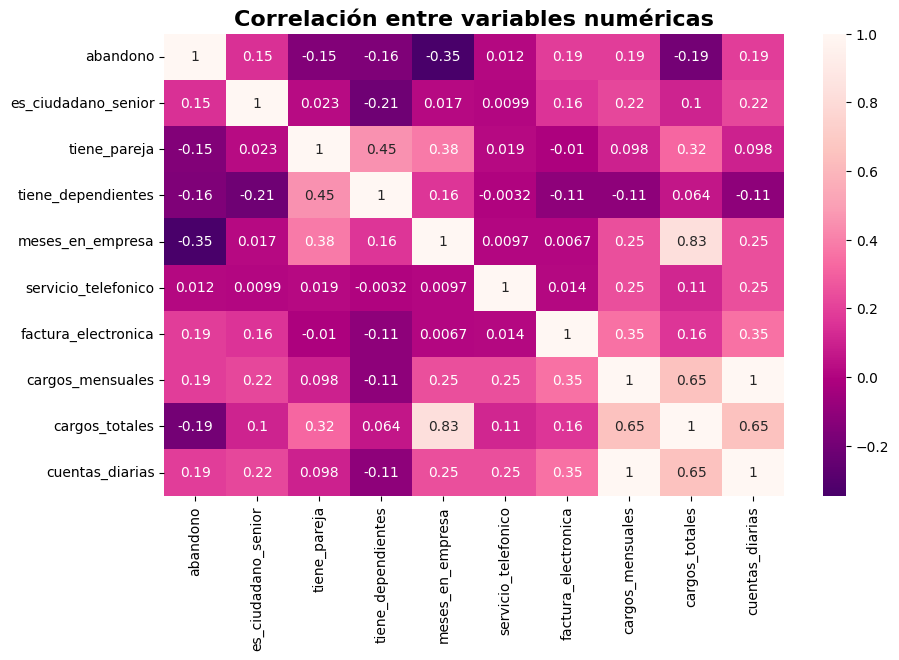

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'telecom_df' ya está cargado y contiene columnas numéricas
# Si no lo tienes, puedes crear un DataFrame de ejemplo para probar el código.
# ... (código para crear telecom_df si es necesario)

plt.figure(figsize=(10,6))
# Usamos una paleta de colores más vibrante y la invertimos para el contraste
sns.heatmap(telecom_df.corr(numeric_only=True), annot=True, cmap="RdPu_r")
plt.title("Correlación entre variables numéricas", fontsize=16, weight='bold', ha='center')
plt.show()

#📄Informe final

**Distribución de la evasión**

Se observó que aproximadamente 25.8% de los clientes han cancelado el servicio.

Gráfico:

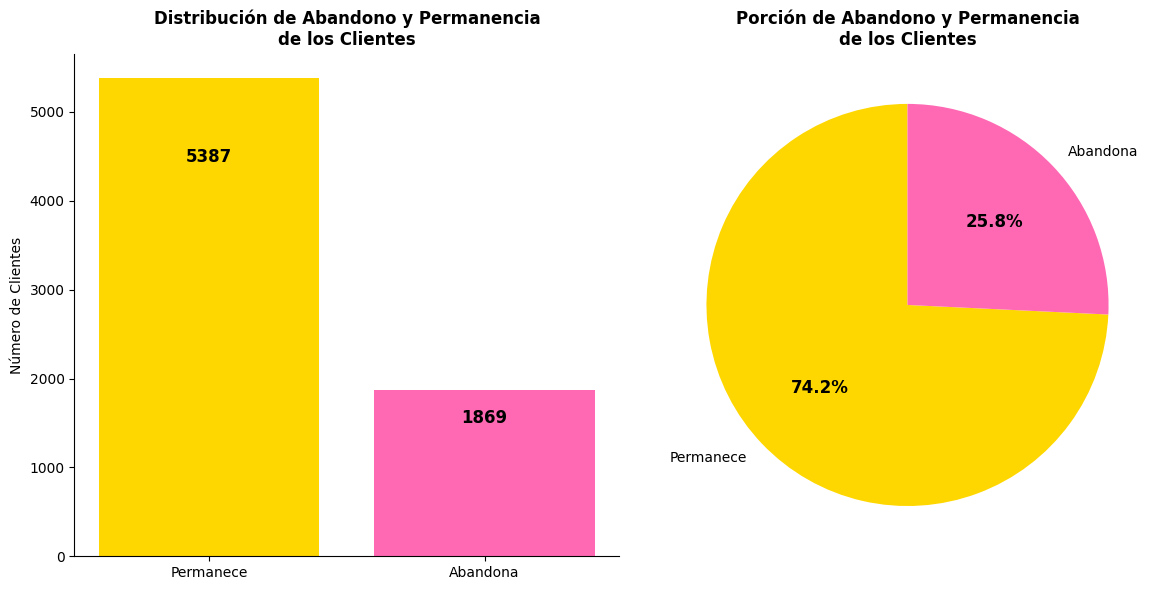

**Análisis por variables categóricas**

**Tipo de Contrato:** Los clientes con contrato mensual presentan una mayor tasa de cancelación.

**Método de Pago:** Los que pagan con tarjeta electrónica tienen mayor churn que quienes usan otros métodos.

**Género:** No se identificaron diferencias significativas en evasión por género.

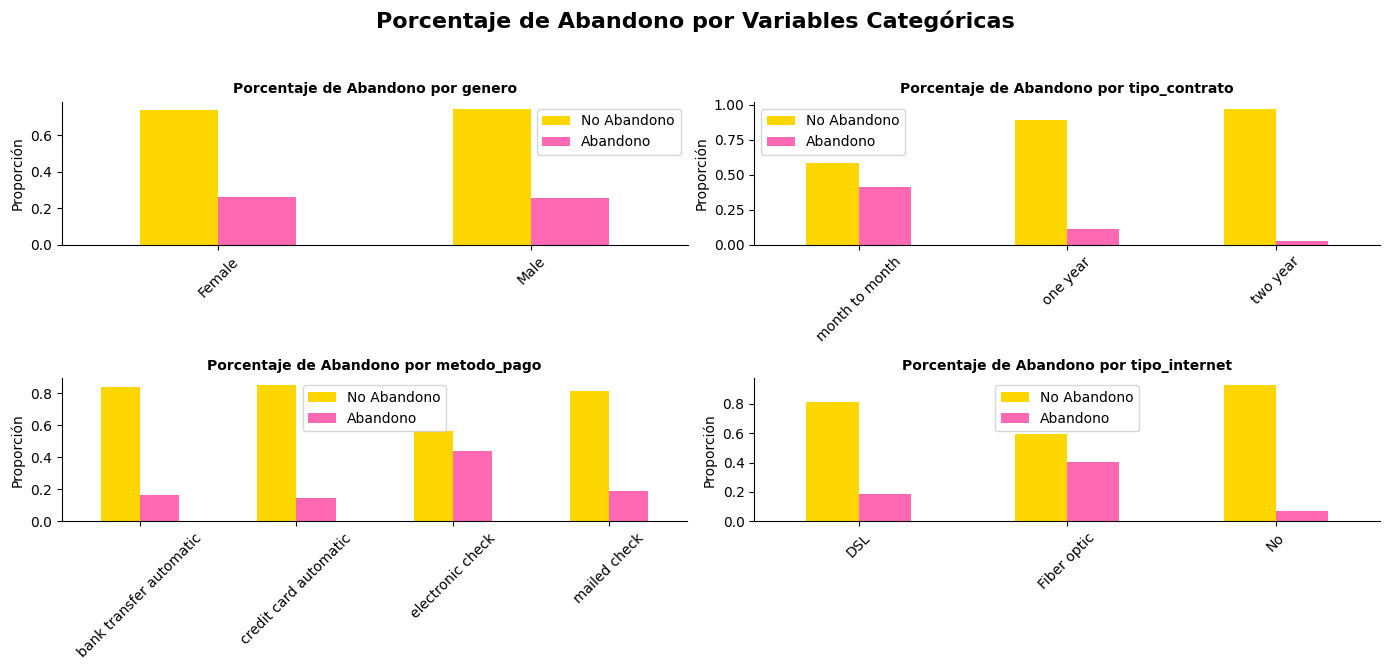

**Análisis por Variables Binarias**
Se analizó la relación entre abandono y variables binarias.

**Es ciudadano senior**: tienden a abandonar más.

**Tiene pareja:** menor evasión.

**Tiene dependientes:** menor evasión.

**Servicio telefónico:** sin diferencia notable.

**Factura electrónica:** quienes la reciben tienden a abandonar más.
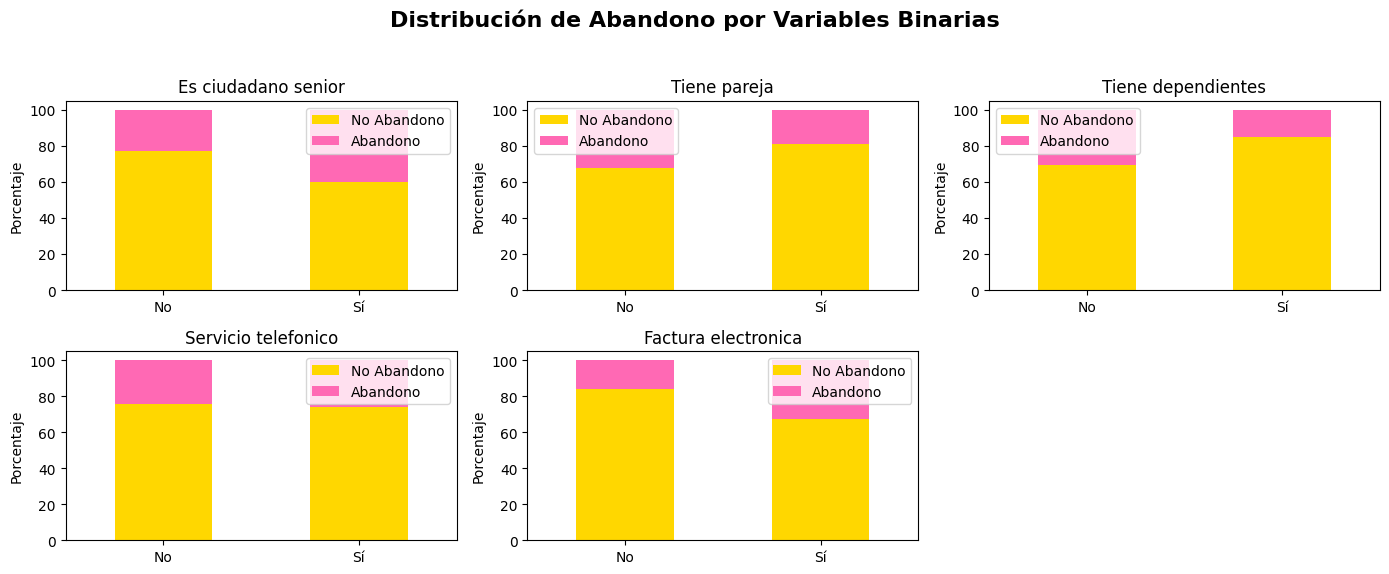

**Análisis por variables numéricas**

**Meses como cliente: **Los nuevos clientes tienden a cancelar más; los que han permanecido más tiempo son más leales.

**Total Gasto:** Algunos clientes con alto gasto también cancelan, lo que puede indicar problemas en la percepción del valor del servicio.

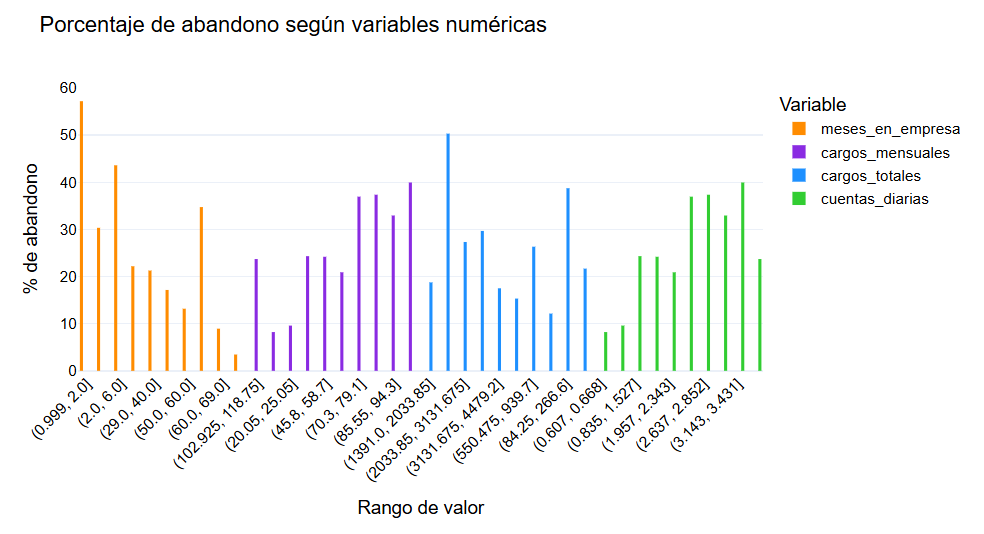

**Mapa de calor de correlaciones**

Para identificar relaciones entre variables numéricas:

**Principales observaciones:**

* **meses_en_empresa y abandono:**

Correlación: -0.35
Interpretación: Los clientes con más tiempo en la empresa tienden a abandonar menos. Esta es una de las correlaciones más fuertes con la variable objetivo, lo cual indica que la fidelidad aumenta con el tiempo.

* **cargos_mensuales y abandono:**

Correlación: 0.19
Interpretación: A mayor cargo mensual, mayor probabilidad de abandono. Podría estar relacionado con insatisfacción por precios altos.

* **factura_electronica y abandono:**

Correlación: 0.19
Interpretación: Los clientes que usan factura electrónica tienen una leve mayor tendencia a abandonar. Tal vez son clientes más digitalizados o con expectativas de servicio más altas.

* **cargos_totales y abandono:**

Correlación: -0.19
Interpretación: Contrario a lo que podría suponerse, un mayor gasto total está asociado con menor evasión. Esto indica que los clientes de alto valor tienden a quedarse.

* **es_ciudadano_senior y abandono:**

Correlación: 0.15
Interpretación: Los adultos mayores tienden a abandonar un poco más el servicio. Esto puede deberse a menor uso o a barreras tecnológicas.

-

**Otras correlaciones relevantes entre variables (no con abandono):**

* **meses_en_empresa y cargos_totales:**

Correlación: 0.83
Interpretación: Es esperable, ya que entre más tiempo permanezca un cliente, más factura ha generado en total.

* **cargos_mensuales, cuentas_diarias y factura_electronica:**

Todas tienen correlaciones moderadas (alrededor de 0.35–0.65) entre sí, indicando que estos clientes tienen un comportamiento digital más marcado

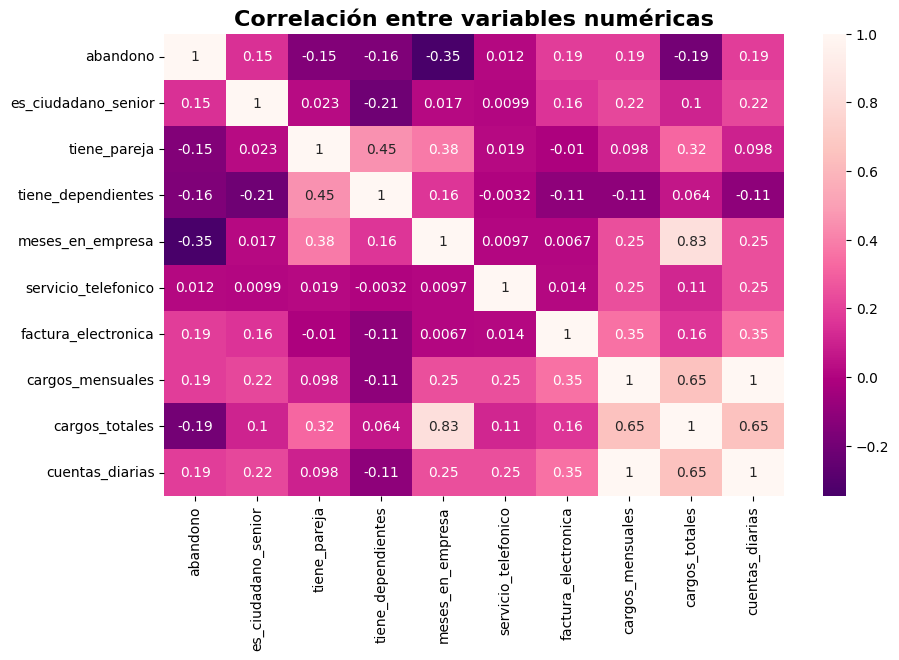

#**Hallazgos Clave**
**El Compromiso es Crucial:** La duración del contrato es el factor más determinante. Los clientes con contratos mensuales tienen la mayor tasa de abandono, mientras que los contratos a largo plazo (uno o dos años) muestran una fidelidad significativamente más alta. Este patrón resalta la importancia de la relación a largo plazo para la retención.

**La Experiencia de los Nuevos Clientes** es un **Punto Crítico:** La deserción es más común en los primeros meses de servicio. Esto sugiere que el período inicial es vital para establecer la lealtad y que la experiencia del cliente durante la incorporación necesita una mejora significativa.

**El Perfil de Clientes en Riesgo:** Se identificaron segmentos de clientes con mayor probabilidad de abandono:

* Clientes mayores (SeniorCitizen)

* Aquellos que no tienen pareja o dependientes.

* Los que utilizan facturación electrónica y el pago con cheque electrónico.

**Valor y Precio:** A mayor gasto mensual, mayor es la probabilidad de abandono, lo que puede indicar una desconexión entre el costo del servicio y el valor percibido por el cliente. Sin embargo, una mayor cantidad de cargos totales acumulados está asociada con una menor deserción, lo que resalta la lealtad de los clientes a largo plazo.

#**Recomendaciones Estratégicas**
Con base en estos hallazgos, se sugieren las siguientes acciones para mitigar la deserción:

**Mejorar la Fidelización Inicial:** Implementar un programa de bienvenida para los nuevos clientes. Esto podría incluir llamadas de seguimiento proactivas o descuentos especiales en los primeros tres meses para asegurar una transición fluida y satisfactoria.

**Incentivar Contratos a Largo Plazo:** Ofrecer descuentos o beneficios exclusivos a los clientes con contratos mensuales para motivarlos a cambiarse a planes de un año o más.

**Optimizar la Experiencia Digital y de Pago:** Investigar la causa de la alta tasa de deserción entre los usuarios de factura electrónica y cheque electrónico. Podría ser necesario mejorar la interfaz de usuario, la transparencia en la facturación o la seguridad percibida.

**Campañas Dirigidas:** Lanzar campañas de retención personalizadas para los segmentos de mayor riesgo (por ejemplo, clientes con alto gasto pero en contratos mensuales, o adultos mayores que pueden necesitar soporte técnico adicional).